In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_load = "data/city_data.csv"
ride_data_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_load)
ride_df = pd.read_csv(ride_data_load)

# Combine the data into a single dataset
df = pd.merge(city_df, ride_df, on = 'city', how = 'left')

# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
df.type.loc[(df['type'] == 'Urban')] = 4
df.type.loc[(df['type'] == 'Suburban')] = 5
df.type.loc[(df['type'] == 'Rural')] = 6

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Bubble Plot of Ride Sharing Data

In [3]:
columns = ['city', 
           'driver_count',
           'fare', 
           'type',
           'ride_id']
aggregations = {
    'driver_count':'min',
    'ride_id': 'count',
    'fare':'mean'}

df1 = df.groupby(['type','city']).agg(aggregations)

df1.head()

driver_count  ride_id       fare
type city                                             
4    Amandaburgh                12       18  24.641667
     Barajasview                26       22  25.332273
     Carriemouth                52       27  28.314444
     Christopherfurt            41       27  24.501852
     Deanville                  49       19  25.842632

In [4]:
df1 = df1.reset_index()
df1.head(10)

,type,city,driver_count,ride_id,fare
0,4,Amandaburgh,12,18,24.641667
1,4,Barajasview,26,22,25.332273
2,4,Carriemouth,52,27,28.314444
3,4,Christopherfurt,41,27,24.501852
4,4,Deanville,49,19,25.842632
5,4,East Kaylahaven,65,29,23.757931
6,4,Erikaland,37,12,24.906667
7,4,Grahamburgh,61,25,25.221200
8,4,Huntermouth,37,24,28.993750
9,4,Hurleymouth,36,28,25.891429


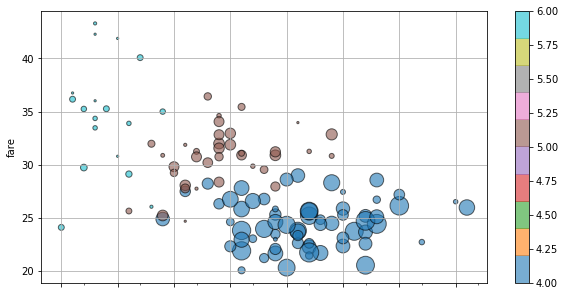

In [5]:
#colors = if:
   #df.type == 'Rural'
    #'r', 'k'
#print(colors)

plot = df1.plot(kind = 'scatter',
        x= 'ride_id',
        y= 'fare',
         s = 5*df1['driver_count'],
         c = df1['type'],
         cmap = 'tab10',
         alpha = .6,
         edgecolor = 'black',
         grid = True,
         figsize = (10,5),
         xticks = np.arange(min(df1['ride_id']), max(df1['ride_id'])+1, 5.0)
        )

fig = plot.get_figure()
plt.xlabel(1)
plt.show()
fig.savefig('test.png')

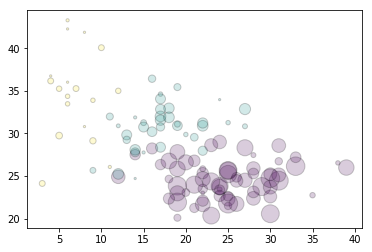

In [6]:
plt.scatter(df1['ride_id'], df1['fare'], alpha=0.2,
            s=5*df1['driver_count'], c=df1['type'], cmap='viridis',
           edgecolor = 'black')
plt.show()

## Total Fares by City Type

In [7]:
# Calculate Type Percents
df3 = df.groupby(['type']).sum().transform(lambda x: x/np.sum(x)*100)

df3 = df3.reset_index()
df3.head()
# Save Figure


,type,driver_count,fare,ride_id
0,4,86.745550,62.724635,68.228066
1,5,12.472893,30.463872,26.766722
2,6,0.781557,6.811493,5.005212


In [8]:
df3.type.loc[(df3['type'] == 4 )] ='Urban'
df3.type.loc[(df3['type'] == 5 )] = 'Suburban'
df3.type.loc[(df3['type'] == 6 )] = 'Rural'

In [9]:
# Build Pie Chart
df4 = df3.drop(['driver_count', 'ride_id'], axis = 1)
df4

,type,fare
0,Urban,62.724635
1,Suburban,30.463872
2,Rural,6.811493


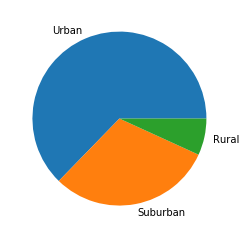

In [10]:
# Show Figure
plt.pie(df4['fare'], labels = df4['type'])
plt.show()

## Total Rides by City Type

In [11]:
# Calculate Ride Percents
df3 = df.groupby(['type']).sum().transform(lambda x: x/np.sum(x)*100)
df3 = df3.reset_index()
df3.type.loc[(df3['type'] == 4 )] ='Urban'
df3.type.loc[(df3['type'] == 5 )] = 'Suburban'
df3.type.loc[(df3['type'] == 6 )] = 'Rural'
df5 = df3.drop(['driver_count', 'fare'], axis = 1)
df5
plt.pie(df5['fare'], labels = df5['type'])
plt.show()

KeyError: 'fare'

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()